<a href="https://colab.research.google.com/github/rodimendes/rest-analysis/blob/main/vendas2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e pastas - EXECUTAR

In [1]:
import pandas as pd
import os
import pathlib
import sqlite3
import datetime as dt
import seaborn as sns

### Sandra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Rodrigo

In [2]:
from google.colab import drive
drive.mount('/ShardDrives/')

Mounted at /ShardDrives/


# Formatando valores para todos o Dataframe - EXECUTAR

In [3]:
pd.set_option('float_format', '{:,.2f}'.format)

# Células que não precisam ser executadas
As células dentro deste toggle não necessitam ser executadas após salvamento do arquivo tratado **'.pkl'**, em células abaixo.

## Renomeando arquivos 
**Desnecessário para estes arquivos** 

Executado e nomes alterados

In [ ]:
"""folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"
for file in os.listdir(folder):
    old_name = folder + file
    data = pd.read_excel(old_name)
    if file[:7] != 'vendas_':
      report_date = data['Unnamed: 1'][1][-10:]
      new_name = f"{folder}vendas_{report_date}.xlsx"
      os.rename(old_name, new_name)"""

## Data opening

### Sandra

In [ ]:
file = "/content/drive/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

### Rodrigo

In [ ]:
file = "/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

## Visão geral do dataframe

In [ ]:
data.head(10)

## Limpeza inicial

In [ ]:
# Limpar linhas vazias e reiniciar o index

df = data.rename(columns=data.iloc[7]).iloc[8:-1].reset_index(drop=True)
df

In [ ]:
# Separando coluna Famila / Sub-Familia em duas

new_column = df['Familia / Sub-Familia'].str.split('/', n=1, expand=True)
df['familia'] = new_column[0]
df['sub_familia'] = new_column[1]

In [ ]:
# Renomeando colunas

df = df[['Data', 'Código', 'Produto', 'familia', 'sub_familia', 'Quantidade', 'Valor Total S/IVA', 'Valor Total']]
df.columns = ['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade', 'total_s_iva', 'total']

### Tratamento de colunas


In [ ]:
# Definindo o tipo adequado para as colunas

df.info()

In [ ]:
df.data = pd.to_datetime(df.data)
df['codigo'] = pd.to_numeric(df['codigo'])
df['quantidade'] = pd.to_numeric(df['quantidade'])
df['total_s_iva'] = pd.to_numeric(df['total_s_iva'])
df['total'] = pd.to_numeric(df['total'])
df.info()

In [ ]:
df.columns

## Criação do Banco de Dados
**Etapa desnecessária para este caso de já termos o dataset completo e não ser necessário atualizar com novos dados**


In [ ]:
#bd = sqlite3.connect("vendas_restaurantes.db")

In [ ]:
#cursor = bd.cursor()

### A célula abaixo só é necessário executar na primeira vez, para a criação da tabela no banco de dados

In [ ]:
#cursor.execute("CREATE TABLE 'Vendas Restauração 2018_2022' (data INTEGER, codigo INT, produto TEXT, familia TEXT, sub_familia TEXT, quantidade INT, total_s_iva REAL, total REAL)")

In [ ]:
#df.head(2)

In [ ]:
#for index, row in df.iterrows():
#    data = row[0]
#    codigo = row[1]
#    produto = row[2]
#    familia = row[3]
#    sub_familia = row[4]
#    quantidade = row[5]
#    total_s_iva = row[6]
#    total = row[7]
#    cursor.execute('''INSERT INTO 'Vendas Restauração 2018_2022' \
#                    (data, codigo, produto, familia, sub_familia, quantidade, total_s_iva, total) VALUES (?,?,?,?,?,?,?,?)''', \
#                    (str(data), codigo, produto, familia, sub_familia, quantidade, total_s_iva, total))
#    
#    bd.commit()

# Rodrigo - EXECUTAR PARA COMEÇAR A ANÁLISE

In [4]:
df_vendas = '/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

# Sandra - EXECUTAR PARA COMEÇAR A ANÁLISE

In [ ]:
df_vendas = '/content/drive/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

#**Primeiras explorações** - EXECUTAR

In [5]:
# Faturamento total do período

faturamento_total = df_vendas.total.sum()
f'A empresa faturou {faturamento_total:,.2f} de euros durante o período'

'A empresa faturou 4,603,194.17 de euros durante o período'

In [6]:
# Faturamento por família

faturamento_familia = df_vendas[['familia', 'total']].groupby(by='familia').sum()
faturamento_familia.sort_values(by='total', ascending=False)

,total
familia,
Comida,"3,058,871.40"
Bebidas,"1,464,298.98"
Outros,"79,387.59"
Talho,370.00
Sem Familia Definida,226.00
Peixaria,20.70
Mercearia,19.50


###Rentabilidade diária

In [7]:
dt.date.isoweekday(df_vendas.data[0])

3

In [8]:
# Criando uma lista com todos os dias de venda e atribuindo a uma nova coluna

dia_semana = []
for dia in df_vendas.data:
  dia_semana.append(dt.date.isoweekday(dia))

df_vendas['dia_semana'] = dia_semana
df_vendas.head(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3
1,2018-01-03,"100,003.00",Batata Doce,Comida,Evento,9.00,41.42,46.80,3


In [9]:
rentabilidade_diaria = df_vendas[['quantidade','total', 'dia_semana']].groupby(by='dia_semana').sum()
rentabilidade_diaria

,quantidade,total
dia_semana,,
1,"2,342.00","31,823.80"
2,"4,147.00","47,654.04"
3,"92,440.01","744,466.71"
4,"104,169.00","888,494.16"
5,"130,162.00","1,082,017.64"
6,"132,789.00","1,089,471.37"
7,"90,730.00","719,266.45"


In [10]:
# Rentabilidade diária, em ordem decrescente, para o período.

rentabilidade_diaria.sort_values(by='total', ascending=False)

,quantidade,total
dia_semana,,
6,"132,789.00","1,089,471.37"
5,"130,162.00","1,082,017.64"
4,"104,169.00","888,494.16"
3,"92,440.01","744,466.71"
7,"90,730.00","719,266.45"
2,"4,147.00","47,654.04"
1,"2,342.00","31,823.80"


In [11]:
# Dia da semana possui mais entradas, ou seja, mais linhas.

df_vendas.dia_semana.value_counts()

5    14997
6    14638
4    13709
3    12233
7    11525
2      696
1      426
Name: dia_semana, dtype: int64

In [12]:
## Por que as segundas e possuem valores muito baixos?
## Quais os dias e horários de funcionamento do restaurante?

In [13]:
df_vendas[df_vendas['dia_semana'] == 1]

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
1375,2018-02-05,"100,131.00",Menu Grupo,Outros,,29.00,513.27,580.00,1
3218,2018-04-02,"100,317.00",Aluguer Espaço,Outros,,1.00,"1,500.00","1,845.00",1
3219,2018-04-02,"100,318.00",Jantar grupo privado,Outros,,40.00,"1,951.22","2,400.00",1
3220,2018-04-02,"100,319.00",Extra,Outros,,1.00,24.39,30.00,1
11200,2018-09-24,2.00,Porco Panado,Comida,Snacks,59.00,215.04,264.50,1
...,...,...,...,...,...,...,...,...,...
56992,2021-12-27,"101,406.00",G Wave,Bebidas,G Branco PT,1.00,32.52,40.00,1
56993,2021-12-27,"101,412.00",G Humus Curtimenta,Bebidas,G Branco PT,1.00,22.76,28.00,1
56994,2021-12-27,"101,413.00",Cp Sol Passito,Bebidas,Copo Outros,1.00,11.38,14.00,1
56995,2021-12-27,"101,418.00",G Capucha Cedro Alvarao,Bebidas,G Branco PT,1.00,40.65,50.00,1


#**Regressão Linear - Faturamento futuro**##

In [14]:
# Bibliotecas para construção do modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
object_df = df_vendas.select_dtypes(include=['object']).copy()

In [16]:
object_df

,produto,familia,sub_familia
0,Avenida,Bebidas,Cerveja
1,Batata Doce,Comida,Evento
2,Berbigão,Comida,Pratos
3,Cp Dashi,Bebidas,Soft Drinks
4,Cp Phaunus Pet Nat,Bebidas,Espumantes
...,...,...,...
68219,Alheta Pescada,Comida,Especiais
68220,Leite Frito,Comida,Sobremesas
68221,Extra Tosta,Comida,Snacks
68222,Cereja,Comida,Sobremesas


In [17]:
anos = []
for dia in df_vendas['data']:
  year = dia.year
  anos.append(year)

print(len(anos))

68224


In [18]:
df_vendas['ano'] = anos

In [19]:
meses = []
for dia in df_vendas['data']:
  mes = dia.month_name()
  meses.append(mes)

print(len(meses))
print(meses[0])

68224
January


In [20]:
df_vendas['mes'] = meses

In [21]:
# Célula teste

df_vendas.sample(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano,mes
53670,2021-10-21,"101,054.00",G Joa Tinto 15,Bebidas,G Tinto PT,1.00,41.46,51.00,4,2021,October
4999,2018-05-17,"100,007.00",Cp A. M. Tinto,Bebidas,Copo Tinto,5.00,26.42,32.50,4,2018,May


In [22]:
# Agrupar por anos e analisar ano a ano

df_2018 = df_vendas[df_vendas['ano'] == 2018]
df_2019 = df_vendas[df_vendas['ano'] == 2019]
df_2020 = df_vendas[df_vendas['ano'] == 2020]
df_2021 = df_vendas[df_vendas['ano'] == 2021]
df_2022 = df_vendas[df_vendas['ano'] == 2022]

In [23]:
print(f'Ano 2018 - {df_2018.shape}')
print(f'Ano 2019 - {df_2019.shape}')
print(f'Ano 2020 - {df_2020.shape}')
print(f'Ano 2021 - {df_2021.shape}')
print(f'Ano 2022 - {df_2022.shape}')

Ano 2018 - (15713, 11)
Ano 2019 - (18731, 11)
Ano 2020 - (10630, 11)
Ano 2021 - (12220, 11)
Ano 2022 - (10930, 11)


In [24]:
df_vendas[['quantidade', 'total', 'ano']].groupby(by='ano').sum()

,quantidade,total
ano,,
2018,"128,783.00","970,481.34"
2019,"172,435.00","1,354,907.69"
2020,"69,450.00","561,141.00"
2021,"95,049.01","831,493.13"
2022,"91,062.00","885,171.01"


## Rodrigo - **Regressão Linear para 2018**

Fazer modelo para todos os anos e verificar padrão.

In [25]:
df_2018.head(1)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano,mes
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3,2018,January


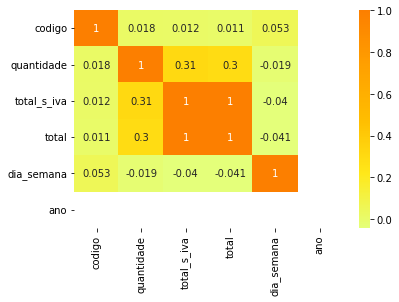

In [26]:
sns.heatmap(df_2018.corr(), cmap='Wistia', annot=True);

In [53]:
# Dividir as vendas por mês - Dataframe e gráfico - VER AULAS A PARTIR DE 78

vendas_mes_2018 = df_2018.groupby(df_2018['data'].dt.month_name()).sum().sort_values('total')[['total']]
vendas_mes_2018

KeyError: ignored

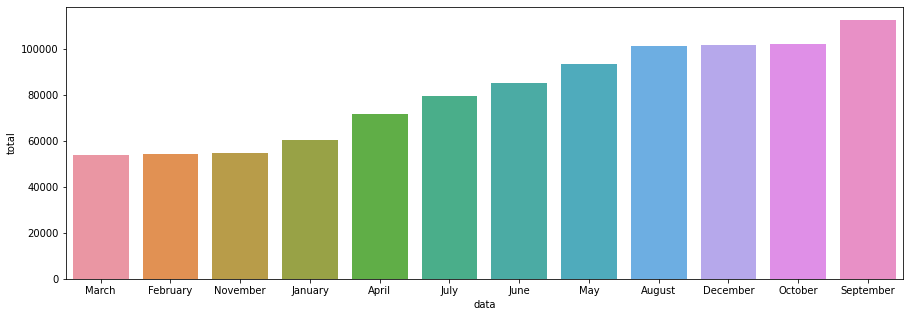

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=vendas_mes_2018.index, y=vendas_mes_2018['total']);

In [50]:
graph = px.bar(data_frame=vendas_mes_2018, x=vendas_mes_2018.index, y='total', color='total', text='total', text_auto='.3s', hover_name=vendas_mes_2018.index)
graph.update_layout(coloraxis_showscale=False, xaxis_title='Meses', yaxis_title='Rendimento (€)')

In [ ]:
px.pie(data_frame=vendas_mes_2018, hole=0.5, values=vendas_mes_2018.total, names=vendas_mes_2018.index)

In [62]:
# Dividir por família - Dataframe e gráfico

vendas_familia_2018 = df_2018.groupby(by=['familia', 'mes']).sum()[['total']]
vendas_familia_2018

total
familia  mes                
Bebidas  April     20,636.53
         August    33,115.01
         December  31,215.07
         February  16,101.20
         January   19,078.69
         July      24,983.45
         June      28,772.08
         March     16,516.92
         May       25,562.93
         November  18,983.88
         October   32,762.07
         September 39,193.38
Comida   April     46,385.76
         August    65,845.24
         December  70,321.15
         February  36,835.83
         January   39,583.80
         July      49,719.84
         June      54,024.90
         March     37,019.14
         May       56,353.21
         November  35,586.88
         October   63,376.98
         September 73,363.15
Outros   April      4,835.00
         August     2,049.97
         February   1,450.00
         January    1,828.00
         July       4,928.50
         June       2,460.00
         March        280.00
         May       11,381.00
         October    5,931.78

In [59]:
df_2018['familia'].unique()

array(['Bebidas ', 'Comida ', 'Outros '], dtype=object)

In [ ]:
df_2018_data_total = df_2018[['data', 'total']].groupby(by='data').sum()

In [ ]:
df_2018_data_total.describe()

In [ ]:
fig = plt.figure(figsize=(15, 8))

sns.lineplot(x=df_2018_data_total.index, y=df_2018_data_total['total'])

In [ ]:
df_2018_data_total[['total']].boxplot();

In [ ]:
teste_data_total = df_2018[['data', 'total']]

In [ ]:
df_2018[df_2018['data'] == '2018-05-10'].tail(50)

In [ ]:
# Analisar anos com e sem 'OUTROS' na coluna família.
# Agrupar por dia da semana e ver os dias mais rentáveis, sem outliers.
# Separar o dataframe e ver se é possível fazer previsões anuais.
# Continuar a ver os vídeos da Le Wagon sobre etapas da regressão linear.

# Comandos GITHUB

In [ ]:
# Fazer o git funcionar para o trabalho
"""
Para abrir:
  Clicar ARQUIVO >> ABRIR NOTEBOOK
  Selecionar a aba GITHUB e localizar o repositório 'rodimendes/rest-analysis', o branch MAIN e clicar no arquivo 'vendas2018_2022.ipynb'
Ao sair:
  Clicar ARQUIVO >> SALVAR UMA CÓPIA NO GITHUB
  Na janela que se abrirá, conferir repositório, branch e clicar em OK
"""

In [ ]:
# Agrupar por mês e analisar mês a mês (??)
# Agrupar por dia e analisar o dia a dia
# Fazer RL e identificar o comportamento da sazonalidade e a "outra"
# Fazer Time Series e comparar modelos
# meses = []
